<a href="https://colab.research.google.com/github/Gilberto119/Machine-Learning/blob/main/6_RegLogMysqlML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial MySQL, Pandas, Regresión logística con statsmodels

## Instalación e importación de bibliotecas necesarias para trabajar

In [1]:
#Biblioteca de machine learning con herramientas útiles
#!pip install scikit-learn
import sklearn

In [2]:
#Actualización de pip si es necesaria
#!pip install --upgrade pip

In [ ]:
#Instalación de MySQL y el conector para utilizar Python
!pip install mysql
!pip install mysql-connector-python
import mysql.connector as sql



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Conexión a la base de datos de MySQL utilizando Python

In [ ]:
db_connect = sql.connect(host='database-1.cvxrkue0ncmc.us-east-1.rds.amazonaws.com', database='datasets_ml', user = 'admin', password = 'Picadita#1109')
print(db_connect)

In [ ]:
#Creamos un cursor que nos permita ejecutar queries SQL a traves de la conexión establecida
miCursor = db_connect.cursor()

## Comandos SQL 

Al carga un conjunto de datos en MySQL este pasa a ser una tabla y ahí directamente es donde podemos ejecutar diferentes comandos SQL

### Descripción de la estructura de la tabla

In [ ]:
miCursor.execute("DESC winequality_red")

miResultado = miCursor.fetchall()

for x in miResultado:
  print(x)

('fixed acidity', b'double', 'YES', '', None, '')
('volatile acidity', b'double', 'YES', '', None, '')
('citric acid', b'double', 'YES', '', None, '')
('residual sugar', b'double', 'YES', '', None, '')
('chlorides', b'double', 'YES', '', None, '')
('free sulfur dioxide', b'int', 'YES', '', None, '')
('total sulfur dioxide', b'int', 'YES', '', None, '')
('density', b'double', 'YES', '', None, '')
('pH', b'double', 'YES', '', None, '')
('sulphates', b'double', 'YES', '', None, '')
('alcohol', b'double', 'YES', '', None, '')
('class', b'int', 'YES', '', None, '')


### SELECT

In [ ]:
miCursor.execute("SELECT * FROM winequality_red LIMIT 10")
miResultado = miCursor.fetchall()
for x in miResultado:
  print(x)

(7.4, 0.7, 0.0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4, 0)
(7.8, 0.88, 0.0, 2.6, 0.098, 25, 67, 0.9968, 3.2, 0.68, 9.8, 0)
(7.8, 0.76, 0.04, 2.3, 0.092, 15, 54, 0.997, 3.26, 0.65, 9.8, 0)
(11.2, 0.28, 0.56, 1.9, 0.075, 17, 60, 0.998, 3.16, 0.58, 9.8, 1)
(7.4, 0.7, 0.0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4, 0)
(7.4, 0.66, 0.0, 1.8, 0.075, 13, 40, 0.9978, 3.51, 0.56, 9.4, 0)
(7.9, 0.6, 0.06, 1.6, 0.069, 15, 59, 0.9964, 3.3, 0.46, 9.4, 0)
(7.3, 0.65, 0.0, 1.2, 0.065, 15, 21, 0.9946, 3.39, 0.47, 10.0, 1)
(7.8, 0.58, 0.02, 2.0, 0.073, 9, 18, 0.9968, 3.36, 0.57, 9.5, 1)
(7.5, 0.5, 0.36, 6.1, 0.071, 17, 102, 0.9978, 3.35, 0.8, 10.5, 0)


In [ ]:
miCursor.execute("SELECT `fixed acidity` FROM winequality_red LIMIT 10")
miResultado = miCursor.fetchall()
for x in miResultado:
  print(x)

(7.4,)
(7.8,)
(7.8,)
(11.2,)
(7.4,)
(7.4,)
(7.9,)
(7.3,)
(7.8,)
(7.5,)


In [ ]:
miCursor.execute("SELECT `fixed acidity`,alcohol,density,`free sulfur dioxide`,class  FROM winequality_red LIMIT 10")
miResultado = miCursor.fetchall()
for x in miResultado:
  print(x)

(7.4, 9.4, 0.9978, 11, 0)
(7.8, 9.8, 0.9968, 25, 0)
(7.8, 9.8, 0.997, 15, 0)
(11.2, 9.8, 0.998, 17, 1)
(7.4, 9.4, 0.9978, 11, 0)
(7.4, 9.4, 0.9978, 13, 0)
(7.9, 9.4, 0.9964, 15, 0)
(7.3, 10.0, 0.9946, 15, 1)
(7.8, 9.5, 0.9968, 9, 1)
(7.5, 10.5, 0.9978, 17, 0)


In [ ]:
miCursor.execute("SELECT `fixed acidity`,alcohol,density,`free sulfur dioxide`,class  FROM winequality_red WHERE class=0 LIMIT 15")
miResultado = miCursor.fetchall()
for x in miResultado:
  print(x)

(7.4, 9.4, 0.9978, 11, 0)
(7.8, 9.8, 0.9968, 25, 0)
(7.8, 9.8, 0.997, 15, 0)
(7.4, 9.4, 0.9978, 11, 0)
(7.4, 9.4, 0.9978, 13, 0)
(7.9, 9.4, 0.9964, 15, 0)
(7.5, 10.5, 0.9978, 17, 0)
(6.7, 9.2, 0.9959, 15, 0)
(7.5, 10.5, 0.9978, 17, 0)
(5.6, 9.9, 0.9943, 16, 0)
(7.8, 9.1, 0.9974, 9, 0)
(8.9, 9.2, 0.9986, 52, 0)
(8.9, 9.2, 0.9986, 51, 0)
(8.1, 9.3, 0.9968, 16, 0)
(7.4, 9.0, 0.9974, 6, 0)


In [ ]:
miCursor.execute("SELECT alcohol,density,class  FROM winequality_red WHERE class=0  ORDER BY alcohol LIMIT 15")
miResultado = miCursor.fetchall()
for x in miResultado:
  print(x)

(8.4, 0.9994, 0)
(8.5, 0.99914, 0)
(8.8, 1.00242, 0)
(8.8, 1.00242, 0)
(9.0, 1.0004, 0)
(9.0, 0.9978, 0)
(9.0, 0.99706, 0)
(9.0, 0.9956, 0)
(9.0, 0.99706, 0)
(9.0, 0.9979, 0)
(9.0, 1.0008, 0)
(9.0, 0.9972, 0)
(9.0, 0.9978, 0)
(9.0, 0.9974, 0)
(9.0, 0.9962, 0)


### ALTER TABLE

In [ ]:
miCursor.execute("ALTER TABLE winequality_red ADD id INT NOT NULL AUTO_INCREMENT primary key")

In [ ]:
miCursor.execute("SELECT id,alcohol,density,class  FROM winequality_red ORDER BY id LIMIT 15")
miResultado = miCursor.fetchall()
for x in miResultado:
  print(x)

(1, 9.4, 0.9978, 0)
(2, 9.8, 0.9982, 1)
(3, 10.8, 0.9994, 1)
(4, 10.7, 0.9969, 0)
(5, 10.5, 0.9962, 1)
(6, 9.5, 0.9967, 1)
(7, 9.8, 0.9968, 0)
(8, 9.8, 0.9982, 1)
(9, 9.8, 0.997, 0)
(10, 10.7, 1.0006, 1)
(11, 9.8, 0.998, 1)
(12, 9.5, 0.9962, 0)
(13, 9.4, 0.9978, 0)
(14, 9.5, 0.9961, 0)
(15, 9.4, 0.9978, 0)


In [ ]:
sql = "INSERT INTO winequality_red (`fixed acidity`,`volatile acidity`,`citric acid`,`residual sugar`,chlorides, `free sulfur dioxide`, `total sulfur dioxide`, density, pH, sulphates,alcohol,class) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)"
val = (7.4, 0.7, 0.5, 1.9, 0.076, 14, 35, 0.9978, 3.51, 0.42, 9.6, 0)
miCursor.execute(sql, val)

db_connect.commit()

print(miCursor.rowcount, "Registro existoso.")

1 Registro existoso.


In [ ]:
miCursor.execute("SELECT * FROM winequality_red ORDER BY id DESC LIMIT 5")
miResultado = miCursor.fetchall()
for x in miResultado:
  print(x)

(7.4, 0.7, 0.5, 1.9, 0.076, 14, 35, 0.9978, 3.51, 0.42, 9.6, 0, 1600)
(6.0, 0.31, 0.47, 3.6, 0.067, 18, 42, 0.99549, 3.39, 0.66, 11.0, 1, 1599)
(5.9, 0.645, 0.12, 2.0, 0.075, 32, 44, 0.99547, 3.57, 0.71, 10.2, 0, 1598)
(6.3, 0.51, 0.13, 2.3, 0.076, 29, 40, 0.99574, 3.42, 0.75, 11.0, 1, 1597)
(5.9, 0.55, 0.1, 2.2, 0.062, 39, 51, 0.99512, 3.52, 0.76, 11.2, 1, 1596)


### UPDATE

In [ ]:
sql = "UPDATE winequality_red SET `fixed acidity`= 8.4 WHERE id=1600"
miCursor.execute(sql)
db_connect.commit()
print(miCursor.rowcount, "Cambio existoso.")

1 Cambio existoso.


In [ ]:
miCursor.execute("SELECT * FROM winequality_red ORDER BY id DESC LIMIT 5")
miResultado = miCursor.fetchall()
for x in miResultado:
  print(x)

(8.4, 0.7, 0.5, 1.9, 0.076, 14, 35, 0.9978, 3.51, 0.42, 9.6, 0, 1600)
(6.0, 0.31, 0.47, 3.6, 0.067, 18, 42, 0.99549, 3.39, 0.66, 11.0, 1, 1599)
(5.9, 0.645, 0.12, 2.0, 0.075, 32, 44, 0.99547, 3.57, 0.71, 10.2, 0, 1598)
(6.3, 0.51, 0.13, 2.3, 0.076, 29, 40, 0.99574, 3.42, 0.75, 11.0, 1, 1597)
(5.9, 0.55, 0.1, 2.2, 0.062, 39, 51, 0.99512, 3.52, 0.76, 11.2, 1, 1596)


### DELETE

In [ ]:
sql = "DELETE FROM winequality_red WHERE id=1600"
miCursor.execute(sql)
db_connect.commit()
print(miCursor.rowcount, "Eliminación existosa.")

1 Eliminación existosa.


In [ ]:
miCursor.execute("SELECT * FROM winequality_red ORDER BY id DESC LIMIT 5")
miResultado = miCursor.fetchall()
for x in miResultado:
  print(x)

(6.0, 0.31, 0.47, 3.6, 0.067, 18, 42, 0.99549, 3.39, 0.66, 11.0, 1, 1599)
(5.9, 0.645, 0.12, 2.0, 0.075, 32, 44, 0.99547, 3.57, 0.71, 10.2, 0, 1598)
(6.3, 0.51, 0.13, 2.3, 0.076, 29, 40, 0.99574, 3.42, 0.75, 11.0, 1, 1597)
(5.9, 0.55, 0.1, 2.2, 0.062, 39, 51, 0.99512, 3.52, 0.76, 11.2, 1, 1596)
(6.2, 0.6, 0.08, 2.0, 0.09, 32, 44, 0.9949, 3.45, 0.58, 10.5, 0, 1595)


In [ ]:
## Usando la conexión con MySQL para construir DataFrames utilizando Pandas

In [ ]:
#!pip install pandas
import pandas as pd

In [ ]:
df = pd.read_sql('SELECT `fixed acidity`,`volatile acidity`,`citric acid`,`residual sugar`,chlorides, `free sulfur dioxide`, `total sulfur dioxide`, density, pH, sulphates,alcohol, class from winequality_red', con=db_connect)
df.head()

C:\Users\link_\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
1,10.9,0.390,0.47,1.8,0.118,6,14,0.9982,3.30,0.75,9.8,1
2,12.8,0.300,0.74,2.6,0.095,9,28,0.9994,3.20,0.77,10.8,1
3,9.3,0.320,0.57,2.0,0.074,27,65,0.9969,3.28,0.79,10.7,0
4,8.0,0.705,0.05,1.9,0.074,8,19,0.9962,3.34,0.95,10.5,1


## Separando las variables independientes y la dependiente

In [ ]:
# con esto tomamos todas las variables excepto 'class' como variables independiente
X = df.drop(['class'], axis = 1)  
# con esto tomamos solo a la variable 'class' como variable dependiente
y = df['class'] 

## Creando el conjunto de prueba y entrenamiento con scikit-learn

In [ ]:
# llamamos a la biblioteca que divide nuestros datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

## Instalando e importando la biblioteca para la construcción de modelos de regresión statsmodels

In [ ]:
#!pip install statsmodels
import statsmodels.api as sm

## Modelo de regresión logística

In [ ]:
#Obtenemos la matriz de correlación para saber si existe multicolinealidad entre las variables independientes
datosRegLog = df[['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'class']]
datosRegLog.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153845,-0.113198,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010592,0.076479,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060836,0.035506,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187235,0.203048,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005599,0.047402,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153845,-0.010592,-0.060836,0.187235,0.005599,1.000000,0.668147,-0.022154,0.070254,0.051574,-0.069253,-0.061635
total sulfur dioxide,-0.113198,0.076479,0.035506,0.203048,0.047402,0.668147,1.000000,0.071256,-0.066507,0.042923,-0.205667,-0.231979
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.022154,0.071256,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070254,-0.066507,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051574,0.042923,0.148506,-0.196648,1.000000,0.093595,0.218072


In [ ]:
#Obtener los signos
ytrain = y_train
Xtrain = sm.add_constant(X_train[['fixed acidity']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.682621
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                0.005331
Time:                        23:27:28   Log-Likelihood:                -763.85
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                  0.004219
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5927      0.298     -1.991      0.047      -1.176      -0.009
fixed acidity     0.0996      0.035      2.831      0.005       0.031       0.168
=================================================================================
"""

In [ ]:
ytrain = y_train
Xtrain = sm.add_constant(X_train[['volatile acidity']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.625228
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                 0.08896
Time:                        23:28:01   Log-Likelihood:                -699.63
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                 1.452e-31
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.5288      0.225     11.260      0.000       2.089       2.969
volatile acidity    -4.3444      0.407    -10.685      0.000      -5.141      -3.548
====================================================================================
"""

In [ ]:
ytrain = y_train
Xtrain = sm.add_constant(X_train[['citric acid']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.674251
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                 0.01753
Time:                        23:30:32   Log-Likelihood:                -754.49
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                 2.123e-07
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2059      0.105     -1.970      0.049      -0.411      -0.001
citric acid     1.6434      0.322      5.111      0.000       1.013       2.274
===============================================================================
"""

In [ ]:
ytrain = y_train
Xtrain = sm.add_constant(X_train[['residual sugar']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.686200
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:               0.0001151
Time:                        23:30:35   Log-Likelihood:                -767.86
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                    0.6741
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2818      0.126      2.235      0.025       0.035       0.529
residual sugar    -0.0185      0.044     -0.421      0.674      -0.104       0.068
==================================================================================
"""

In [ ]:
ytrain = y_train
Xtrain = sm.add_constant(X_train[['chlorides']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.677228
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                 0.01319
Time:                        23:30:37   Log-Likelihood:                -757.82
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                 6.772e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8110      0.157      5.150      0.000       0.502       1.120
chlorides     -6.6618      1.714     -3.888      0.000     -10.020      -3.303
==============================================================================
"""

In [ ]:
ytrain = y_train
Xtrain = sm.add_constant(X_train[['free sulfur dioxide']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.684573
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                0.002485
Time:                        23:30:40   Log-Likelihood:                -766.04
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                   0.05072
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4094      0.108      3.793      0.000       0.198       0.621
free sulfur dioxide    -0.0109      0.006     -1.951      0.051      -0.022    5.16e-05
=======================================================================================
"""

In [ ]:
ytrain = y_train
Xtrain = sm.add_constant(X_train[['total sulfur dioxide']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.657152
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                 0.04244
Time:                        23:30:43   Log-Likelihood:                -735.35
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                 6.816e-16
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9605      0.112      8.591      0.000       0.741       1.180
total sulfur dioxide    -0.0159      0.002     -7.705      0.000      -0.020      -0.012
========================================================================================
"""

In [ ]:
ytrain = y_train
Xtrain = sm.add_constant(X_train[['density']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.673219
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                 0.01903
Time:                        23:31:00   Log-Likelihood:                -753.33
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                 6.431e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.9914     32.948      5.281      0.000     109.415     238.568
density     -174.3206     33.054     -5.274      0.000    -239.105    -109.536
==============================================================================
"""

In [ ]:
ytrain = y_train
Xtrain = sm.add_constant(X_train[['pH']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.686138
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:               0.0002060
Time:                        23:31:02   Log-Likelihood:                -767.79
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                    0.5738
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4959      1.301     -0.381      0.703      -3.047       2.055
pH             0.2208      0.393      0.562      0.574      -0.549       0.990
==============================================================================
"""

In [ ]:
ytrain = y_train
Xtrain = sm.add_constant(X_train[['sulphates']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.662930
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                 0.03402
Time:                        23:31:06   Log-Likelihood:                -741.82
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                 4.873e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7013      0.298     -5.717      0.000      -2.285      -1.118
sulphates      2.9711      0.453      6.552      0.000       2.082       3.860
==============================================================================
"""

In [ ]:
ytrain = y_train
Xtrain = sm.add_constant(X_train[['alcohol']])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.581712
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.1524
Time:                        23:31:08   Log-Likelihood:                -650.94
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                 7.919e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4550      0.813    -12.866      0.000     -12.048      -8.862
alcohol        1.0331      0.079     13.044      0.000       0.878       1.188
==============================================================================
"""

In [ ]:
#Modelo final congruente
ytrain = y_train
Xtrain = sm.add_constant(X_train[[
 'volatile acidity',
 'chlorides',
 'total sulfur dioxide',
 'sulphates',
 'alcohol'
]])#Agrega el intercepto en un modelo de regresión
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.514704
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1113
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2500
Time:                        23:35:40   Log-Likelihood:                -575.95
converged:                       True   LL-Null:                       -767.95
Covariance Type:            nonrobust   LLR p-value:                 8.383e-81
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.3827      0.962     -7.672      0.000      -9.269      -5.497
volatile acidity        -3.3268      0.450     -7.391      0.000      -4.209      -2.445
chlorides               -5.6977      1.750     -3.255      0.001      -9.129      -2.267
total sulfur dioxide    -0.0132      0.002     -5.315      0.000      -0.018      -0.008
sulphates                2.7251      0.511      5.335      0.000       1.724       3.726
alcohol                  0.8407      0.084      9.979      0.000       0.676       1.006
========================================================================================
"""

## Evaluación del modelo de regresión logística

In [ ]:
Xtest = sm.add_constant(X_test[['volatile acidity',
 'chlorides',
 'total sulfur dioxide',
 'sulphates',
 'alcohol']])
ytest = y_test
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
actuales= list(map(int,ytest.values))  
# comparing original and predicted values of y
print('Valores actuales', list(actuales))
print('Predicciones :', prediction)

Valores actuales [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
from sklearn.metrics import ConfusionMatrixDisplay
  
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm)


# Exactitud de modelo
print('Test accuracy = ', accuracy_score(ytest, prediction))

Confusion Matrix : 
 [[182  68]
 [ 67 163]]
Test accuracy =  0.71875


# Tutorial MongoDB y scikit-learn

## Instalación de bibliotecas pymongo

In [ ]:
!pip install pymongo
import pymongo

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 365.3/365.3 kB 2.8 MB/s eta 0:00:00


## Conexión, visualización, selección o creación de base de datos

In [ ]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
dblist = myclient.list_database_names()
print(dblist)

['admin', 'config', 'datasets_ml', 'local']


## Visualización, selección o creación de la colección

In [ ]:
mydb = myclient["datasets_ml"]
print(mydb.list_collection_names())

['iris']


In [ ]:
mycol = mydb["iris"]

NameError: ignored

## Comandos MongoDB

### Buscar un solo documento (Find One)

In [ ]:
x = mycol.find_one()

print(x)


NameError: ignored

### Buscar varios documentos (Find) y condicionales

In [ ]:
for x in mycol.find().limit(5):
  print(x)

NameError: ignored

In [ ]:
myquery = { "Species": "Iris-versicolor"}
mydoc = mycol.find(myquery).limit(10)

for x in mydoc:
  print(x)

In [ ]:
myquery = { "SepalLengthCm": { "$lt": 6.0 } }
mydoc = mycol.find(myquery).limit(10)

for x in mydoc:
  print(x)

### Insert One

In [ ]:
mydict = { 'Id': 151, 'SepalLengthCm': 5.0, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.6, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa' }
x = mycol.insert_one(mydict)
print(x)

In [ ]:
myquery = { "Id": 151}
mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

### Update One

In [ ]:
myquery = { "Id": 151}
newvalues = { "$set": { "SepalLengthCm": 5.1 } }
mycol.update_one(myquery, newvalues)
#Imprimir despues de la actualización
myquery = { "Id": 151}
mydoc = mycol.find(myquery)
for x in mydoc:
  print(x)

### Delete One

In [ ]:
myquery = { "Id": 151}
x = mycol.delete_many(myquery)

print(x.deleted_count, " Documento eliminado.")

In [ ]:
myquery = { "Id": 151}
mydoc = mycol.find(myquery)
for x in mydoc:
  print(x)

## MongoDB a DataFrame

In [ ]:
import pandas as pd
cursor = mycol.find()
print(cursor)
print('Type of cursor:',type(cursor))

Type of cursor: <class 'pymongo.cursor.Cursor'>


In [ ]:
list_cur = list(cursor)
print(list_cur[1:5])
df = pd.DataFrame(list_cur)
print('Type of df:',type(df))

[{'_id': ObjectId('62cbbf6267cbe7f0641b9117'), 'Id': 2, 'SepalLengthCm': 4.9, 'SepalWidthCm': 3, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}, {'_id': ObjectId('62cbbf6267cbe7f0641b9118'), 'Id': 3, 'SepalLengthCm': 4.7, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.3, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}, {'_id': ObjectId('62cbbf6267cbe7f0641b9119'), 'Id': 4, 'SepalLengthCm': 4.6, 'SepalWidthCm': 3.1, 'PetalLengthCm': 1.5, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}, {'_id': ObjectId('62cbbf6267cbe7f0641b911a'), 'Id': 5, 'SepalLengthCm': 5, 'SepalWidthCm': 3.6, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}]
Type of df: <class 'pandas.core.frame.DataFrame'>


In [ ]:
df.head(5)

,_id,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,62cbbf6267cbe7f0641b9116,1,5.1,3.5,1.4,0.2,Iris-setosa
1,62cbbf6267cbe7f0641b9117,2,4.9,3.0,1.4,0.2,Iris-setosa
2,62cbbf6267cbe7f0641b9118,3,4.7,3.2,1.3,0.2,Iris-setosa
3,62cbbf6267cbe7f0641b9119,4,4.6,3.1,1.5,0.2,Iris-setosa
4,62cbbf6267cbe7f0641b911a,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df=df.drop(['_id','Id'], axis = 1)

In [ ]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Construcción del conjunto de datos separando variables independientes y la variable dependiente

In [ ]:
# con esto tomamos todas las variables excepto 'class' como variables independiente
X = df.drop(['Species'], axis = 1)  
# con esto tomamos solo a la variable 'class' como variable dependiente
y = df['Species']
# llamamos a la biblioteca que divide nuestros datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

## Creación de un modelo de clasificación utilizando un árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Visualización del árbol de decisión

In [ ]:
!pip install matplotlib
from sklearn import tree
from matplotlib import pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.2/7.2 MB 20.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 23.3 MB/s eta 0:00:00
     ------------------------------------- 944.1/944.1 kB 58.4 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00


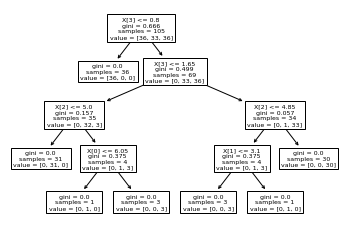

In [ ]:
tree.plot_tree(clf)
plt.show()

## Evaluación del modelo

In [ ]:
predicciones_modelo = clf.predict(X_test) # con esto aplicamos el modelo a los datos de prueba 

In [ ]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
from sklearn.metrics import ConfusionMatrixDisplay
  
# confusion matrix
cm = confusion_matrix(y_test, predicciones_modelo) 
print ("Confusion Matrix : \n", cm)


# Exactitud de modelo
print('Test accuracy = ', accuracy_score(y_test,predicciones_modelo))

Confusion Matrix : 
 [[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]
Test accuracy =  0.9555555555555556
